# Changes from Baseline Model
 


**Baseline model Score**

* RMSE: 1.9123
* Kaggle: 2.3830
 
**Model v3.0 Score**

* RMSE: 1.7917
* Kaggle: 2.3816
  
I think the model is overfitting, I will try to improve the model by changing the hyperparameters of the KNN model.

I will change in v3.1: 
* n_neighbors: 7
* leaf_size: 30
* metric: 'minkowski'
* p: 2
* weights: 'uniform'

# Model v3.1 - KNN-tuning

In [1]:
import pandas as pd

from data import load_data_selected_features

train_data, additional_train_data, test_data = load_data_selected_features()

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150996 entries, p01_0 to p12_25298
Columns: 507 entries, p_num to bg+1:00
dtypes: float64(433), object(74)
memory usage: 585.2+ MB


In [3]:
additional_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168588 entries, p01_test_12 to p24_test_94938
Columns: 507 entries, p_num to bg+1:00
dtypes: float64(433), object(74)
memory usage: 657.4+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3644 entries, p01_8459 to p24_260
Columns: 506 entries, p_num to activity-0:00
dtypes: float64(432), object(74)
memory usage: 14.2+ MB


# Prepare the data

In [5]:
from pipelines_selected_features import pipeline

all_train_data = pd.concat([train_data, additional_train_data], axis=0)
all_train_data_transformed = pipeline.fit_transform(all_train_data)

train_data_transformed = all_train_data_transformed[:len(train_data)]
additional_train_data_transformed = all_train_data_transformed[len(train_data):]

X_train = train_data_transformed.drop(columns=['bg+1:00'])
y_train = train_data_transformed['bg+1:00']

X_additional_train = additional_train_data_transformed.drop(columns=['bg+1:00'])
y_additional_train = additional_train_data_transformed['bg+1:00']

## Predict for validation data and check results

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LassoLarsIC, Ridge

hgb_base_model = HistGradientBoostingRegressor(
    max_iter=200,
    max_depth=5,
    learning_rate=0.1
)

lasso_lars_ic_base_model = LassoLarsIC(
    criterion='bic',
    max_iter=10000
)

knn_base_model = KNeighborsRegressor(
    leaf_size=30,
    metric='minkowski',
    n_neighbors=7,
    p=2,
    weights='uniform'
)

xgb_base_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1
)

estimators = [
    ('hgb', hgb_base_model),
    ('lasso_lars_ic', lasso_lars_ic_base_model),
    ('knn', knn_base_model),
    ('xgb', xgb_base_model),
]

model = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=0.1), n_jobs=-1, verbose=2)

07:03:05 - 07:03:05 - Start training
07:03:05 - 07:03:05 - Calculate performance for hgb
07:03:05 - 07:03:05 - Splitting the additional train data with ShuffleSplit
07:03:05 - 07:03:05 - Split 1 - Model: hgb
07:03:05 - 07:03:05 - Fitting the model
07:03:12 - 07:03:12 - Predicting
07:03:12 - 07:03:12 - Calculating scores
07:03:12 - 07:03:12 - R^2: 0.6180848042610497, RMSE: 2.0255416067785217, MAE: 1.5071299262033768, MSE: 4.1028188007909145
07:03:12 - 07:03:12 - Split 2 - Model: hgb
07:03:12 - 07:03:12 - Fitting the model
07:03:19 - 07:03:19 - Predicting
07:03:19 - 07:03:19 - Calculating scores
07:03:19 - 07:03:19 - R^2: 0.6121637687723192, RMSE: 2.0444653509721173, MAE: 1.5229700762930314, MSE: 4.179838571325543
07:03:19 - 07:03:19 - Split 3 - Model: hgb
07:03:19 - 07:03:19 - Fitting the model
07:03:26 - 07:03:26 - Predicting
07:03:26 - 07:03:26 - Calculating scores
07:03:26 - 07:03:26 - R^2: 0.6149540860764813, RMSE: 2.0164891994777885, MAE: 1.5043978294041023, MSE: 4.066228691610572


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.4s remaining:   27.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   49.0s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.1s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   51.5s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.9s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


07:07:32 - 07:07:32 - Predicting
07:07:40 - 07:07:40 - Calculating scores
07:07:49 - 07:07:49 - R^2: 0.6598720474183928, RMSE: 1.9115200672441666, MAE: 1.4050342502668438, MSE: 3.6539089674771428
07:07:49 - 07:07:49 - Split 2 - Model: stacking_regressor
07:07:49 - 07:07:49 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.7s remaining:   23.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.2s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.4s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


07:09:33 - 07:09:33 - Predicting
07:09:42 - 07:09:42 - Calculating scores
07:09:51 - 07:09:51 - R^2: 0.6553071364907086, RMSE: 1.9273993652977004, MAE: 1.42073979347106, MSE: 3.7148683133499785
07:09:51 - 07:09:51 - Split 3 - Model: stacking_regressor
07:09:51 - 07:09:51 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.8s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   45.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.4s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.1s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


07:11:37 - 07:11:37 - Predicting
07:11:46 - 07:11:46 - Calculating scores
07:11:56 - 07:11:56 - R^2: 0.6575506698563758, RMSE: 1.9016815859134648, MAE: 1.4007128490609655, MSE: 3.616392854202351
07:11:56 - 07:11:56 - Split 4 - Model: stacking_regressor
07:11:56 - 07:11:56 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.4s remaining:   24.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   43.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.9s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   49.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


07:13:41 - 07:13:41 - Predicting
07:13:50 - 07:13:50 - Calculating scores
07:13:59 - 07:13:59 - R^2: 0.6557407255317698, RMSE: 1.9289381679294477, MAE: 1.422031965602065, MSE: 3.720802455695014
07:13:59 - 07:13:59 - Split 5 - Model: stacking_regressor
07:13:59 - 07:13:59 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.4s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.1s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   49.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


07:15:44 - 07:15:44 - Predicting
07:15:54 - 07:15:54 - Calculating scores
07:16:04 - 07:16:04 - R^2: 0.6518844743473537, RMSE: 1.915149372790291, MAE: 1.4124004298832449, MSE: 3.6677971200990456
07:16:04 - 07:16:04 - Training finished


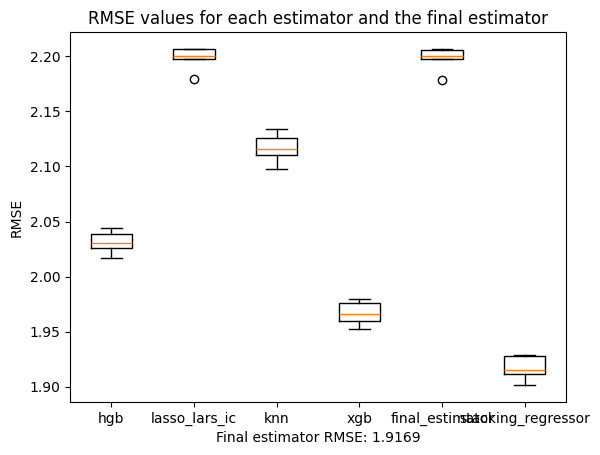

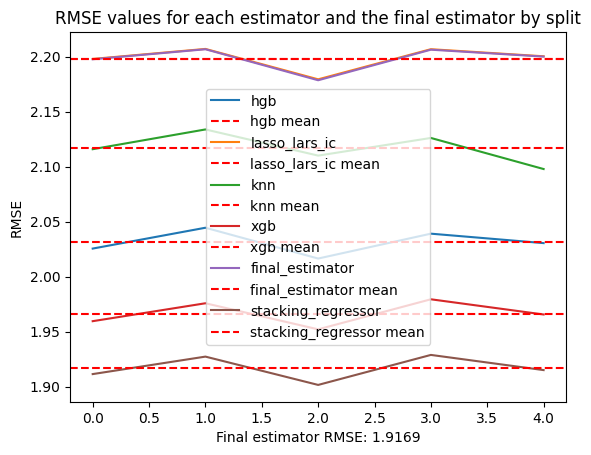

In [7]:
from datetime import datetime
import os
from model_performance_calculations import calculate_stacking_regressor_performance, get_rmse_boxplot_chart, get_rmse_line_chart, save_performances, save_model

date_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
model_name = f'{date_time}-model-v3.0-KNN-tuning'

save_model(model, os.path.join('models', f'{model_name}.pkl'))

performances = calculate_stacking_regressor_performance(model, X_train, y_train, X_additional_train, y_additional_train)
save_performances(performances, os.path.join('models', f'{model_name}-performances.json'))

get_rmse_boxplot_chart(performances).show()
get_rmse_line_chart(performances).show()

In [8]:
import numpy as np
from pipelines_selected_features import pipeline

all_train_data_transformed = pipeline.fit_transform(pd.concat([train_data, additional_train_data], axis=0))

X_train = all_train_data_transformed.drop(columns=['bg+1:00'])
y_train = all_train_data_transformed['bg+1:00']
X_test = pipeline.transform(test_data)

model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.2s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   50.9s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.3s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.5s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.8s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


StackingRegressor(estimators=[('hgb',
                               HistGradientBoostingRegressor(max_depth=5,
                                                             max_iter=200)),
                              ('lasso_lars_ic',
                               LassoLarsIC(criterion='bic', max_iter=10000)),
                              ('knn', KNeighborsRegressor(n_neighbors=7)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_st...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Ridge(alpha=0.1), n_jobs=-1, verbose=2)

In [9]:
y_pred = model.predict(X_test)
test_data['bg+1:00'] = y_pred

if np.sum(y_pred < 0) > 0:
    print(f'Number of negative values: {np.sum(y_pred < 0)}')
    bg_min_train = np.min(y_train)
    print(f'Min value: {np.min(y_pred)}')
    print(f'Filling negative values with {bg_min_train}')
    y_pred = np.where(y_pred < 0, bg_min_train, y_pred)

test_data['bg+1:00'] = y_pred
test_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.152067
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk,5.649122
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.039105
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.060129
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.669024


In [10]:
submission = pd.DataFrame(test_data['bg+1:00'])
submission

,bg+1:00
id,
p01_8459,9.152067
p01_8460,5.649122
p01_8461,8.039105
p01_8462,11.060129
p01_8463,6.669024
...,...
p24_256,6.098140
p24_257,10.352900
p24_258,6.492365


In [11]:
submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')